You are to use a predictive model to predict what each student would get, and then build a simple GUI that would have fields for ID, ATTENDANCE, Score (and other headers as seen on the excel sheet) with a result field and button to predict the score of any student


In [3]:
#libraries

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.feature_selection import RFE   


import math
from sklearn import tree

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import sklearn.datasets 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
#our dataset

df = pd.read_csv('Students.csv')

In [5]:
df.head(10)

ID  Gender  Age StudentId  Attendance  TestScore
0   0    male   58     81 gn        0.81      64.76
1   1    male   54     02 Wd        0.55      35.11
2   2    male   50     83 Kc        0.62      60.24
3   3    male   34     43 RB        0.84      69.97
4   4    male   58     61 sy        0.59      36.89
5   5  female   74     60 IQ        0.73      54.90
6   6    male   55     43 iR        0.79      68.51
7   7    male   57     50 Ui        0.58      52.56
8   8    male   71     79 ML        0.90      66.15
9   9  female   25     72 lt        0.81      73.38

  # Data cleaning 

In [6]:
#let check for the percentage of missing data

percentage_of_missing_data = df.isnull().sum()

In [7]:
percentage_of_missing_data

ID            0
Gender        0
Age           0
StudentId     0
Attendance    0
TestScore     0
dtype: int64

In [8]:
#let check if there are NA values in our data


df.isna()

ID  Gender    Age  StudentId  Attendance  TestScore
0     False   False  False      False       False      False
1     False   False  False      False       False      False
2     False   False  False      False       False      False
3     False   False  False      False       False      False
4     False   False  False      False       False      False
5     False   False  False      False       False      False
6     False   False  False      False       False      False
7     False   False  False      False       False      False
8     False   False  False      False       False      False
9     False   False  False      False       False      False
10    False   False  False      False       False      False
11    False   False  False      False       False      False
12    False   False  False      False       False      False
13    False   False  False      False       False      False
14    False   False  False      False       False      False
15    False   False  False      False       False      False
16    False   False  False      False       False      False
17    False   False  False      False       False      False
18    False   False  False      False       False      False
19    False   False  False      False       False      False
20    False   False  False      False       False      False
21    False   False  False      False       False      False
22    False   False  False      False       False      False
23    False   False  False      False       False      False
24    False   False  False      False       False      False
25    False   False  False      False       False      False
26    False   False  False      False       False      False
27    False   False  False      False       False      False
28    False   False  False      False       False      False
29    False   False  False      False       False      False
...     ...     ...    ...        ...         ...        ...
9850  False   False  False      False       False      False
9851  False   False  False      False       False      False
9852  False   False  False      False       False      False
9853  False   False  False      False       False      False
9854  False   False  False      False       False      False
9855  False   False  False      False       False      False
9856  False   False  False      False       False      False
9857  False   False  False      False       False      False
9858  False   False  False      False       False      False
9859  False   False  False      False       False      False
9860  False   False  False      False       False      False
9861  False   False  False      False       False      False
9862  False   False  False      False       False      False
9863  False   False  False      False       False      False
9864  False   False  False      False       False      False
9865  False   False  False      False       False      False
9866  False   False  False      False       False      False
9867  False   False  False      False       False      False
9868  False   False  False      False       False      False
9869  False   False  False      False       False      False
9870  False   False  False      False       False      False
9871  False   False  False      False       False      False
9872  False   False  False      False       False      False
9873  False   False  False      False       False      False
9874  False   False  False      False       False      False
9875  False   False  False      False       False      False
9876  False   False  False      False       False      False
9877  False   False  False      False       False      False
9878  False   False  False      False       False      False
9879  False   False  False      False       False      False

[9880 rows x 6 columns]

In [9]:
#lets drop NA values in case of any

df.dropna()

ID  Gender  Age StudentId  Attendance  TestScore
0        0    male   58     81 gn        0.81      64.76
1        1    male   54     02 Wd        0.55      35.11
2        2    male   50     83 Kc        0.62      60.24
3        3    male   34     43 RB        0.84      69.97
4        4    male   58     61 sy        0.59      36.89
5        5  female   74     60 IQ        0.73      54.90
6        6    male   55     43 iR        0.79      68.51
7        7    male   57     50 Ui        0.58      52.56
8        8    male   71     79 ML        0.90      66.15
9        9  female   25     72 lt        0.81      73.38
10      10    male   32     81 hD        0.70      43.13
11      11    male   38     94 jl        0.95      95.51
12      12    male   54     53 BG        0.58      48.25
13      13    male   57     89 GK        0.68      55.06
14      14  female   45     63 xt        0.63      70.67
15      15  female   43     42 hE        0.75      65.46
16      16    male   44     07 lF        0.39      18.54
17      17    male   67     87 tH        0.49      31.44
18      18  female   39     44 Rq        0.87      82.97
19      19  female   48     74 Iq        0.59      47.69
20      20  female   59     77 eV        0.50      58.13
21      21  female   38     92 Vr        0.81      61.87
22      22    male   42     69 mW        0.81      73.11
23      23  female   39     50 mH        0.82      88.67
24      24    male   49     87 gW        0.75      73.41
25      25    male   59     99 Cz        0.70      52.23
26      26    male   25     97 ep        0.83      57.78
27      27    male   35     35 sX        0.79      51.72
28      28  female   68     05 GH        0.75      55.02
29      29  female   52     61 pT        0.64      59.67
...    ...     ...  ...       ...         ...        ...
9850  9969  female   40     64 hQ        0.94      74.48
9851  9970    male   64     02 Ka        0.63      46.30
9852  9971    male   40     02 RQ        0.83      59.51
9853  9972    male   60     29 vS        0.48      53.75
9854  9973  female   58     77 nQ        0.78      69.86
9855  9974  female   43     49 MM        0.85      77.84
9856  9975    male   56     37 nM        0.56      43.35
9857  9976    male   41     07 fK        0.53      54.06
9858  9977    male   53     02 Tz        0.82      77.82
9859  9978    male   48     64 Bd        0.58      59.47
9860  9979    male   76     54 ZQ        0.95      98.95
9861  9980    male   59     09 cg        0.67      55.91
9862  9981    male   36     95 VI        0.65      49.65
9863  9982  female   34     79 Xh        0.91      85.79
9864  9983    male   34     50 od        0.73      66.18
9865  9984    male   48     38 tp        0.35      35.78
9866  9985  female   76     51 Qn        0.74      70.26
9867  9986  female   55     04 ks        0.75      49.65
9868  9987    male   46     16 bw        0.87      83.82
9869  9988    male   61     53 Ls        0.80      78.55
9870  9989  female   37     37 Sg        0.75      64.53
9871  9990    male   69     55 RG        0.66      57.07
9872  9991  female   53     92 nF        0.89      68.42
9873  9992    male   51     17 fN        0.42      41.30
9874  9993    male   53     87 Qo        0.60      50.28
9875  9994    male   55     87 DD        0.59      43.26
9876  9995    male   70     80 js        0.47      26.71
9877  9997  female   48     01 SH        0.83      65.20
9878  9998    male   52     75 lE        0.81      59.90
9879  9999    male   34     03 Ep        0.56      50.25

[9880 rows x 6 columns]

In [10]:
#lets drop all NA/NAN values 

df.dropna(axis = 'index', how='all')

ID  Gender  Age StudentId  Attendance  TestScore
0        0    male   58     81 gn        0.81      64.76
1        1    male   54     02 Wd        0.55      35.11
2        2    male   50     83 Kc        0.62      60.24
3        3    male   34     43 RB        0.84      69.97
4        4    male   58     61 sy        0.59      36.89
5        5  female   74     60 IQ        0.73      54.90
6        6    male   55     43 iR        0.79      68.51
7        7    male   57     50 Ui        0.58      52.56
8        8    male   71     79 ML        0.90      66.15
9        9  female   25     72 lt        0.81      73.38
10      10    male   32     81 hD        0.70      43.13
11      11    male   38     94 jl        0.95      95.51
12      12    male   54     53 BG        0.58      48.25
13      13    male   57     89 GK        0.68      55.06
14      14  female   45     63 xt        0.63      70.67
15      15  female   43     42 hE        0.75      65.46
16      16    male   44     07 lF        0.39      18.54
17      17    male   67     87 tH        0.49      31.44
18      18  female   39     44 Rq        0.87      82.97
19      19  female   48     74 Iq        0.59      47.69
20      20  female   59     77 eV        0.50      58.13
21      21  female   38     92 Vr        0.81      61.87
22      22    male   42     69 mW        0.81      73.11
23      23  female   39     50 mH        0.82      88.67
24      24    male   49     87 gW        0.75      73.41
25      25    male   59     99 Cz        0.70      52.23
26      26    male   25     97 ep        0.83      57.78
27      27    male   35     35 sX        0.79      51.72
28      28  female   68     05 GH        0.75      55.02
29      29  female   52     61 pT        0.64      59.67
...    ...     ...  ...       ...         ...        ...
9850  9969  female   40     64 hQ        0.94      74.48
9851  9970    male   64     02 Ka        0.63      46.30
9852  9971    male   40     02 RQ        0.83      59.51
9853  9972    male   60     29 vS        0.48      53.75
9854  9973  female   58     77 nQ        0.78      69.86
9855  9974  female   43     49 MM        0.85      77.84
9856  9975    male   56     37 nM        0.56      43.35
9857  9976    male   41     07 fK        0.53      54.06
9858  9977    male   53     02 Tz        0.82      77.82
9859  9978    male   48     64 Bd        0.58      59.47
9860  9979    male   76     54 ZQ        0.95      98.95
9861  9980    male   59     09 cg        0.67      55.91
9862  9981    male   36     95 VI        0.65      49.65
9863  9982  female   34     79 Xh        0.91      85.79
9864  9983    male   34     50 od        0.73      66.18
9865  9984    male   48     38 tp        0.35      35.78
9866  9985  female   76     51 Qn        0.74      70.26
9867  9986  female   55     04 ks        0.75      49.65
9868  9987    male   46     16 bw        0.87      83.82
9869  9988    male   61     53 Ls        0.80      78.55
9870  9989  female   37     37 Sg        0.75      64.53
9871  9990    male   69     55 RG        0.66      57.07
9872  9991  female   53     92 nF        0.89      68.42
9873  9992    male   51     17 fN        0.42      41.30
9874  9993    male   53     87 Qo        0.60      50.28
9875  9994    male   55     87 DD        0.59      43.26
9876  9995    male   70     80 js        0.47      26.71
9877  9997  female   48     01 SH        0.83      65.20
9878  9998    male   52     75 lE        0.81      59.90
9879  9999    male   34     03 Ep        0.56      50.25

[9880 rows x 6 columns]

In [11]:
df.dropna(axis = 'index', how='any')

ID  Gender  Age StudentId  Attendance  TestScore
0        0    male   58     81 gn        0.81      64.76
1        1    male   54     02 Wd        0.55      35.11
2        2    male   50     83 Kc        0.62      60.24
3        3    male   34     43 RB        0.84      69.97
4        4    male   58     61 sy        0.59      36.89
5        5  female   74     60 IQ        0.73      54.90
6        6    male   55     43 iR        0.79      68.51
7        7    male   57     50 Ui        0.58      52.56
8        8    male   71     79 ML        0.90      66.15
9        9  female   25     72 lt        0.81      73.38
10      10    male   32     81 hD        0.70      43.13
11      11    male   38     94 jl        0.95      95.51
12      12    male   54     53 BG        0.58      48.25
13      13    male   57     89 GK        0.68      55.06
14      14  female   45     63 xt        0.63      70.67
15      15  female   43     42 hE        0.75      65.46
16      16    male   44     07 lF        0.39      18.54
17      17    male   67     87 tH        0.49      31.44
18      18  female   39     44 Rq        0.87      82.97
19      19  female   48     74 Iq        0.59      47.69
20      20  female   59     77 eV        0.50      58.13
21      21  female   38     92 Vr        0.81      61.87
22      22    male   42     69 mW        0.81      73.11
23      23  female   39     50 mH        0.82      88.67
24      24    male   49     87 gW        0.75      73.41
25      25    male   59     99 Cz        0.70      52.23
26      26    male   25     97 ep        0.83      57.78
27      27    male   35     35 sX        0.79      51.72
28      28  female   68     05 GH        0.75      55.02
29      29  female   52     61 pT        0.64      59.67
...    ...     ...  ...       ...         ...        ...
9850  9969  female   40     64 hQ        0.94      74.48
9851  9970    male   64     02 Ka        0.63      46.30
9852  9971    male   40     02 RQ        0.83      59.51
9853  9972    male   60     29 vS        0.48      53.75
9854  9973  female   58     77 nQ        0.78      69.86
9855  9974  female   43     49 MM        0.85      77.84
9856  9975    male   56     37 nM        0.56      43.35
9857  9976    male   41     07 fK        0.53      54.06
9858  9977    male   53     02 Tz        0.82      77.82
9859  9978    male   48     64 Bd        0.58      59.47
9860  9979    male   76     54 ZQ        0.95      98.95
9861  9980    male   59     09 cg        0.67      55.91
9862  9981    male   36     95 VI        0.65      49.65
9863  9982  female   34     79 Xh        0.91      85.79
9864  9983    male   34     50 od        0.73      66.18
9865  9984    male   48     38 tp        0.35      35.78
9866  9985  female   76     51 Qn        0.74      70.26
9867  9986  female   55     04 ks        0.75      49.65
9868  9987    male   46     16 bw        0.87      83.82
9869  9988    male   61     53 Ls        0.80      78.55
9870  9989  female   37     37 Sg        0.75      64.53
9871  9990    male   69     55 RG        0.66      57.07
9872  9991  female   53     92 nF        0.89      68.42
9873  9992    male   51     17 fN        0.42      41.30
9874  9993    male   53     87 Qo        0.60      50.28
9875  9994    male   55     87 DD        0.59      43.26
9876  9995    male   70     80 js        0.47      26.71
9877  9997  female   48     01 SH        0.83      65.20
9878  9998    male   52     75 lE        0.81      59.90
9879  9999    male   34     03 Ep        0.56      50.25

[9880 rows x 6 columns]

In [12]:
#lets fill our NA/NAN values and missing values with anything. ex! missingmissing

df.fillna('missingmissing')

ID  Gender  Age StudentId  Attendance  TestScore
0        0    male   58     81 gn        0.81      64.76
1        1    male   54     02 Wd        0.55      35.11
2        2    male   50     83 Kc        0.62      60.24
3        3    male   34     43 RB        0.84      69.97
4        4    male   58     61 sy        0.59      36.89
5        5  female   74     60 IQ        0.73      54.90
6        6    male   55     43 iR        0.79      68.51
7        7    male   57     50 Ui        0.58      52.56
8        8    male   71     79 ML        0.90      66.15
9        9  female   25     72 lt        0.81      73.38
10      10    male   32     81 hD        0.70      43.13
11      11    male   38     94 jl        0.95      95.51
12      12    male   54     53 BG        0.58      48.25
13      13    male   57     89 GK        0.68      55.06
14      14  female   45     63 xt        0.63      70.67
15      15  female   43     42 hE        0.75      65.46
16      16    male   44     07 lF        0.39      18.54
17      17    male   67     87 tH        0.49      31.44
18      18  female   39     44 Rq        0.87      82.97
19      19  female   48     74 Iq        0.59      47.69
20      20  female   59     77 eV        0.50      58.13
21      21  female   38     92 Vr        0.81      61.87
22      22    male   42     69 mW        0.81      73.11
23      23  female   39     50 mH        0.82      88.67
24      24    male   49     87 gW        0.75      73.41
25      25    male   59     99 Cz        0.70      52.23
26      26    male   25     97 ep        0.83      57.78
27      27    male   35     35 sX        0.79      51.72
28      28  female   68     05 GH        0.75      55.02
29      29  female   52     61 pT        0.64      59.67
...    ...     ...  ...       ...         ...        ...
9850  9969  female   40     64 hQ        0.94      74.48
9851  9970    male   64     02 Ka        0.63      46.30
9852  9971    male   40     02 RQ        0.83      59.51
9853  9972    male   60     29 vS        0.48      53.75
9854  9973  female   58     77 nQ        0.78      69.86
9855  9974  female   43     49 MM        0.85      77.84
9856  9975    male   56     37 nM        0.56      43.35
9857  9976    male   41     07 fK        0.53      54.06
9858  9977    male   53     02 Tz        0.82      77.82
9859  9978    male   48     64 Bd        0.58      59.47
9860  9979    male   76     54 ZQ        0.95      98.95
9861  9980    male   59     09 cg        0.67      55.91
9862  9981    male   36     95 VI        0.65      49.65
9863  9982  female   34     79 Xh        0.91      85.79
9864  9983    male   34     50 od        0.73      66.18
9865  9984    male   48     38 tp        0.35      35.78
9866  9985  female   76     51 Qn        0.74      70.26
9867  9986  female   55     04 ks        0.75      49.65
9868  9987    male   46     16 bw        0.87      83.82
9869  9988    male   61     53 Ls        0.80      78.55
9870  9989  female   37     37 Sg        0.75      64.53
9871  9990    male   69     55 RG        0.66      57.07
9872  9991  female   53     92 nF        0.89      68.42
9873  9992    male   51     17 fN        0.42      41.30
9874  9993    male   53     87 Qo        0.60      50.28
9875  9994    male   55     87 DD        0.59      43.26
9876  9995    male   70     80 js        0.47      26.71
9877  9997  female   48     01 SH        0.83      65.20
9878  9998    male   52     75 lE        0.81      59.90
9879  9999    male   34     03 Ep        0.56      50.25

[9880 rows x 6 columns]

# quick wrangling of our data

In [13]:
#lets know the numbers of male and female

df['Gender'].value_counts()

male      4954
female    4926
Name: Gender, dtype: int64

In [14]:
#lets know the number of student with highest textscore

Student_highest_TestScore =(df['TestScore']> 99.92)

In [15]:
df.loc[ Student_highest_TestScore]                     

ID  Gender  Age StudentId  Attendance  TestScore
307    311  female   43     73 nb        0.97      99.95
4868  4930    male   46     22 FP        0.84      99.93
8604  8703  female   77     69 Al        0.97      99.93

In [16]:
#lets know the number of student with lowest textscore

Student_lowest_TestScore =(df['TestScore']< 1.30)

In [17]:
df.loc[ Student_lowest_TestScore]                     

ID  Gender  Age StudentId  Attendance  TestScore
70      70    male   46     20 LU        0.21       0.01
1070  1085  female   24     49 qb        0.31       1.03
1236  1257    male   49     61 bx        0.25       1.22
1527  1551  female   58     33 ed        0.15       0.50
1959  1986    male   75     93 ZM        0.28       0.90

In [18]:
#let see the median of our data

df.median()

ID            5002.50
Age             49.00
Attendance       0.75
TestScore       64.44
dtype: float64

In [19]:
df.describe()

ID          Age   Attendance    TestScore
count  9880.000000  9880.000000  9880.000000  9880.000000
mean   4999.213664    49.367206     0.730917    63.089545
std    2884.242943    14.975675     0.151874    17.736368
min       0.000000     1.000000     0.150000     0.010000
25%    2503.750000    39.000000     0.630000    51.677500
50%    5002.500000    49.000000     0.750000    64.440000
75%    7493.250000    60.000000     0.850000    76.150000
max    9999.000000   100.000000     1.000000    99.950000

In [20]:
 #lets see the Number of male student Testscore that are above 99
    
df[(df['Gender'] == 'male') &
     (df['TestScore'] > 99.30)]

ID Gender  Age StudentId  Attendance  TestScore
33      33   male   65     70 FO        0.93      99.65
1334  1355   male   60     44 qq        0.98      99.38
1580  1605   male   55     14 hH        0.87      99.61
3610  3656   male   28     54 ea        0.94      99.49
4868  4930   male   46     22 FP        0.84      99.93
6437  6509   male   22     96 xO        0.96      99.59
6944  7022   male   23     73 ke        0.89      99.91
9342  9457   male   37     94 uI        0.88      99.91

In [21]:
#let see the Number of female student Testscore that are above 99

df[(df['Gender'] == 'female') &
     (df['TestScore'] > 99.30)]

ID  Gender  Age StudentId  Attendance  TestScore
249    250  female   40     85 FN        0.92      99.89
307    311  female   43     73 nb        0.97      99.95
334    338  female   54     60 JV        0.94      99.89
1411  1433  female   60     29 CU        0.92      99.76
3324  3367  female   53     70 iQ        0.92      99.54
4578  4639  female   40     11 DT        0.94      99.79
6443  6515  female   48     06 zX        0.93      99.37
7508  7593  female   65     62 Mk        0.90      99.38
8189  8283  female   67     54 ad        0.91      99.85
8486  8582  female   51     06 VK        0.94      99.40
8604  8703  female   77     69 Al        0.97      99.93
8610  8710  female   28     06 zA        0.97      99.42
9285  9400  female   91     71 jR        0.97      99.43
9492  9607  female   59     37 iJ        0.88      99.60

In [22]:
#Lets compare the Testscores secured by male and female


df.groupby(['Gender']).agg(['min','median','max'])

ID               Age             Attendance              TestScore  \
       min  median   max min median  max        min median   max       min   
Gender                                                                       
female   5  4964.5  9997   1     49  100       0.15   0.77  1.00      0.50   
male     0  5050.0  9999   3     49   99       0.15   0.73  0.99      0.01   

                      
       median    max  
Gender                
female  66.52  99.95  
male    62.38  99.93

In [23]:
#Lets check the Effect of attandance on Student's TestScore


df[[ 'Gender', 'TestScore', 'Attendance']].groupby(['Gender']).agg('median')

TestScore  Attendance
Gender                       
female      66.52        0.77
male        62.38        0.73

# lets check the probability of  all students scoring more than 10 in the test

In [24]:
all_students = df.shape[0]
all_students_scoring_more_than_10 = df[df['TestScore'] > 10.00].shape[0]

probability_of_all_students_scoring_more_than_10 = (all_students_scoring_more_than_10/all_students)*100


In [25]:
print("Probability of Students Scoring more than 10 in the testscore is :", 
      probability_of_all_students_scoring_more_than_10  )

('Probability of Students Scoring more than 10 in the testscore is :', 0)


In [26]:
# getting the mean testscore
print("mean_TestScore:", df['TestScore'].mean())

('mean_TestScore:', 63.08954453441274)


In [27]:
# getting the mean attendance score
print("mean_Attendance_Score:", df['Attendance'].mean())

('mean_Attendance_Score:', 0.7309170040485808)


In [28]:
# getting the mean age score
print("mean_age_Score:", df['Age'].mean())

('mean_age_Score:', 49.36720647773279)


# predicting testscore using student attendance

we will initialise our linear regression model, then fit the model to our predictors


In [29]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Attendance ~ TestScore', data=df)
model = model.fit()

In [30]:
model

In [31]:

model.params



Intercept    0.280036
TestScore    0.007147
dtype: float64

In [32]:
# Predict values

TestScore_pred = model.predict()

x = df['Attendance']
y = df['TestScore']


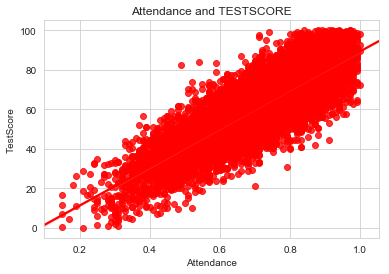

In [33]:
# Plot regression against actual data

sns.regplot(x = 'Attendance', y = 'TestScore', data=df, color='r', )

plt.xlabel('Attendance')
plt.ylabel('TestScore')
plt.title('Attendance and TESTSCORE')

plt.show()



We can see that there is a positive linear relationship between TestScore  and students attendance.  in other words, having more attendence,  predicts a higher number of TestScore! With this model, we can predict Testscore  from any number of attendance a student have. For example, if a student increases his/her attandance level to 0.89, we can predict that his/her TestScore  will increase to 50 



In [34]:
new_X = 0.89
model.predict({"TestScore": new_X})

0    0.286396
dtype: float64

# now let use Linear Regression with scikit-learn to predict our model


In [35]:
# Build linear regression model using age and attendence as predictors


predictors = ['Age', 'Attendance']

X = df[predictors]
y = df['TestScore']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

just have to call .intercept_ for stud1, and .coef_ for an array with our coefficients stud1 and stud2:

In [36]:
stud1 = model.intercept_
stud2 = model.coef_

In [37]:
stud1


-8.274660629701145

In [38]:
stud2

array([2.45337108e-03, 9.74708328e+01])

now We can predict values by simply using .predict():

In [39]:
model.predict(X)

array([70.81900946, 45.46677944, 52.27992426, ..., 72.7438924 ,
       70.80428923, 46.39242035])

Now that we’ve fit a multiple linear regression model to our data, we can predict Testscore from any combination of Age and student Attendance.  For example, if we wanted to know how many  Testscore a student will have if increase attendence to 80% and age equal to 60,  all we have to do is plug in the values!

In [40]:
new_X = [[80, 60]]
print(model.predict(new_X))

[5840.17157667]


This means that if student attendance increase to 80% and age equal 60,  we should expect to see, on average, 5840.17157667 Testscore



# training and testing

In [41]:
predictors = ['Age', 'Attendance']

X = df[predictors]
Y = df['TestScore']

In [42]:
#now lets train  our data 


# Split data into training and testing sets using `train_test_split` method


trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=0)


In [43]:
lm.predict(testX)

array([76.70896673, 66.86865535, 82.51060265, ..., 65.94056107,
       83.4411503 , 62.0049272 ])

In [44]:
lm = LinearRegression()
lm.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
lm.score(trainX, trainY)

0.6938917318772568

The following will display the parameters of the model:

In [46]:
lm.coef_

array([-1.49910605e-03,  9.75241933e+01])

In [47]:
lm.intercept_

-8.207078715826661

In [48]:
#correlation

df.corr()

ID       Age  Attendance  TestScore
ID          1.000000  0.000745   -0.003731  -0.006535
Age         0.000745  1.000000   -0.009055  -0.005486
Attendance -0.003731 -0.009055    1.000000   0.834613
TestScore  -0.006535 -0.005486    0.834613   1.000000

m.coef_ returns an array with our coefficients β1 and β2.

The value of R2 can be returned simply calling .score. It turns out to be very close to the value obtained using the statsmodels method in the previous step.

# Data Visualizations


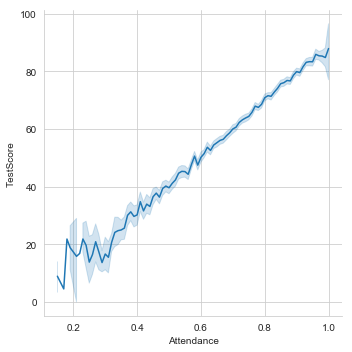

In [49]:
sns.relplot(x = 'Attendance', y = 'TestScore', kind='line', data=df, )

Text(0.5,1,'Comparison of Males and Females')

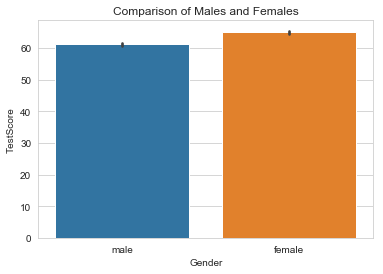

In [50]:
sns.barplot(x = 'Gender', y = 'TestScore', data=df)
plt.title('Comparison of Males and Females', fontweight = 50)

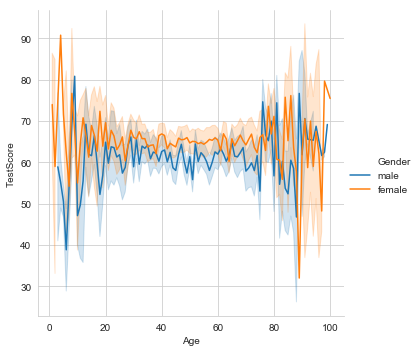

In [51]:
sns.relplot(x = 'Age', y = 'TestScore', hue ='Gender', kind='line', data=df)

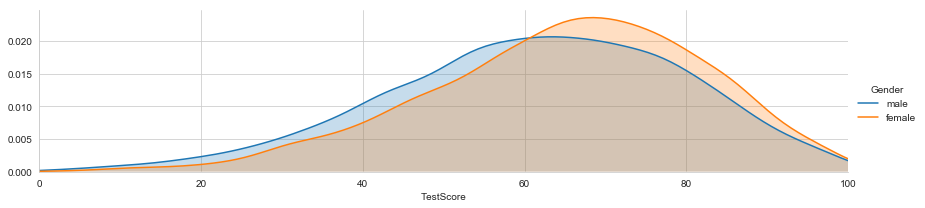

In [52]:
fig = sns.FacetGrid(df, hue="Gender",aspect=4)

fig.map(sns.kdeplot,'TestScore',shade= True)

oldest = df['TestScore'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

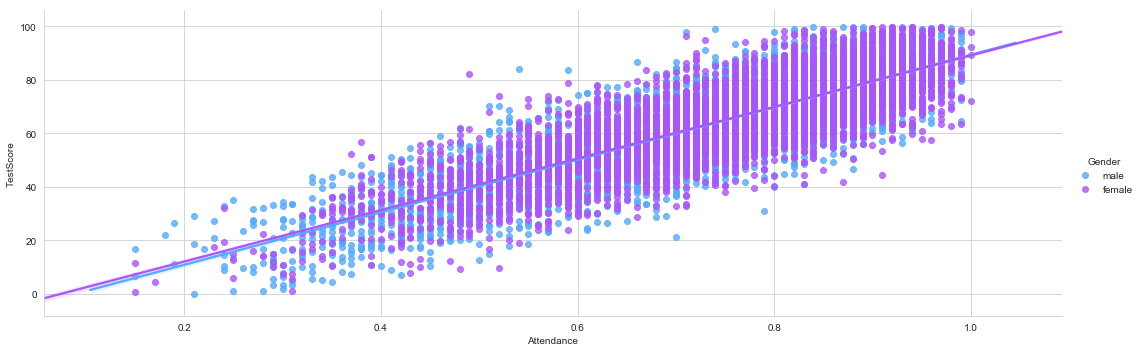

In [53]:
sns.lmplot('Attendance','TestScore',hue='Gender',data=df,palette='cool', aspect=3)

<ErrorbarContainer object of 3 artists>

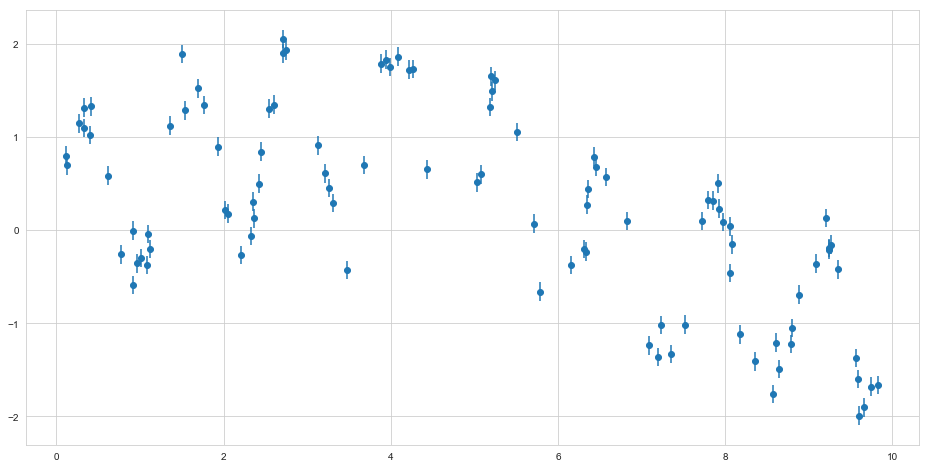

In [54]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    '''
    Generate random sinusoidal data for regression analysis. Does SciKit-Learn have this?
    '''
   
    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

# Call y for data with x
y = sin_model(x)

# Plot x vs y
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

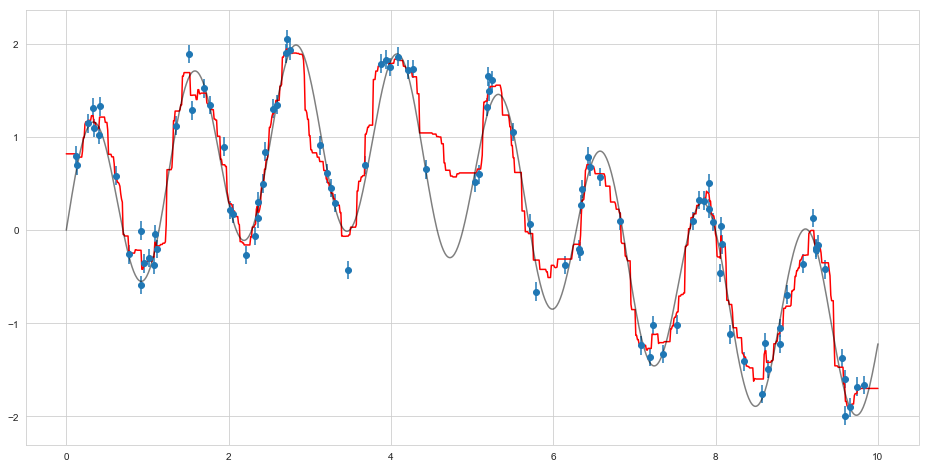

In [55]:
# X points
xfit = np.linspace(0, 10, 1000)

# Model
rfr = RandomForestRegressor(100)

# Fit Model (Format array for y with [:,None])
rfr.fit(x[:, None], y)

# Set predicted points
yfit = rfr.predict(xfit[:, None])

# Set real poitns (the model function)
ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

In [56]:
df.head(2)

ID Gender  Age StudentId  Attendance  TestScore
0   0   male   58     81 gn        0.81      64.76
1   1   male   54     02 Wd        0.55      35.11

In [57]:
from plotly.offline import iplot 
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [60]:
py.offline.init_notebook_mode(connected=True)

In [61]:
cf.go_offline()

In [64]:
dff = pd.read_csv('Students.csv')

In [75]:
dff.iplot(kind='bar', x='Gender', y='TestScore')

In [82]:
cf.set_config_file(theme='solar')
dff.iplot(kind='bar', bargap=0.2, barmode='stack')